# Setup

In [19]:
#Required Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta, MO
import math as math
import scipy.optimize as optimize

In [20]:

#bonds chosen
bonds_selected=['CA135087K866','CA135087L369','CA135087L856','CA135087M763', 'CA135087L690','CA135087M508',
                'CA135087K528', 'CA135087K940','CA135087L518', 'CA135087L930','CA135087M847']
#processing of data
bonds_df=pd.read_csv('APM466A1.csv')
bonds_df['MATURITY']=bonds_df['MATURITY DATE']
bonds_df['MATURITY DATE']=pd.to_datetime(bonds_df['MATURITY DATE'])
bonds_df['Issue Date']=pd.to_datetime(bonds_df['Issue Date'])
bonds_df['COUPON']=bonds_df['COUPON'].str.rstrip('%').astype('float')
bonds_df.sort_values(by=['MATURITY DATE'],inplace=True)
bonds_df=bonds_df[bonds_df['ISIN'].isin(bonds_selected)]
bonds_df





,ISIN,COUPON,Issue Date,MATURITY DATE,1/10/2022,1/11/2022,1/12/2022,1/13/2022,1/14/2022,1/17/2022,1/18/2022,1/19/2022,1/20/2022,1/21/2022,MATURITY
7,CA135087K866,1.50,2020-01-27,2022-05-01,100.350,100.340,100.340,100.320,100.310,100.280,100.270,100.270,100.260,100.270,5/1/2022
9,CA135087L369,0.25,2020-08-17,2022-11-01,99.550,99.540,99.520,99.520,99.500,99.430,99.400,99.420,99.430,99.460,11/1/2022
12,CA135087L856,0.25,2021-02-05,2023-05-01,99.080,99.070,99.050,99.040,99.010,98.900,98.850,98.870,98.870,98.920,5/1/2023
15,CA135087M763,0.50,2021-08-09,2023-11-01,98.968,98.955,98.934,98.911,98.878,98.732,98.666,98.654,98.661,98.717,11/1/2023
10,CA135087L690,0.25,2020-10-16,2024-04-01,97.960,97.960,97.930,97.900,97.860,97.680,97.610,97.600,97.600,97.710,4/1/2024
14,CA135087M508,0.75,2021-07-12,2024-10-01,98.555,98.560,98.530,98.485,98.440,98.205,98.115,98.125,98.140,98.275,10/1/2024
25,CA135087K528,1.25,2019-10-11,2025-03-01,99.640,99.670,99.610,99.590,99.490,99.250,99.120,99.110,99.100,99.260,3/1/2025
26,CA135087K940,0.50,2020-04-03,2025-09-01,96.660,96.720,96.770,96.770,96.680,96.430,96.260,96.150,96.190,96.310,9/1/2025
28,CA135087L518,0.25,2020-10-09,2026-03-01,95.110,95.170,95.120,95.140,95.040,94.750,94.530,94.500,94.520,94.700,3/1/2026
29,CA135087L930,1.00,2021-04-16,2026-09-01,97.660,97.700,97.670,97.695,97.585,97.240,97.020,96.960,97.000,97.225,9/1/2026


# YTM Functions

In [21]:

def PV(r,semi_coupon,n,m,dirty_price):
    discounted_cf=[semi_coupon*math.exp(-0.5*(i+1)*r) for i in range(0,(n))]
    discounted_cf[-1]+=100*math.exp(-0.5*(n)*r)
    #print(discounted_cf)
    PV=sum(discounted_cf)
    PV=PV*math.exp((m/365)*r)
    return (PV-dirty_price)
        
    

def ytm(date,maturity_date,coupon,clean_price):
    coupondate=maturity_date
    n=0
    while (coupondate)>date:
        coupondate=coupondate-relativedelta(months=6)
        n=n+1
    #previous coupon date
    #print(n)
    prev_coup=coupondate
    #print(prev_coup)
    #dirty price=clean price plus accrued interest
    m=(date-prev_coup).days
    #print(m)
    dirty_price=clean_price+((m/365)*coupon)
    #print(dirty_price)
    PV_func=lambda r: PV(r,(coupon/2),n,m,dirty_price)
    optim=optimize.root(PV_func, 0.01)
    r=optim.x[0]
    return r
    

    
    
    


# 4 a) YTM Computation

In [22]:

bonds_df['YTM-1/10/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 10 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/10/2022']),axis=1)

bonds_df['YTM-1/11/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 11 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/11/2022']),axis=1)

bonds_df['YTM-1/12/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 12 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/12/2022']),axis=1)

bonds_df['YTM-1/13/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 13 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/13/2022']),axis=1)

bonds_df['YTM-1/14/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 14 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/14/2022']),axis=1)

bonds_df['YTM-1/17/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 17 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/17/2022']),axis=1)

bonds_df['YTM-1/18/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 18 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/18/2022']),axis=1)

bonds_df['YTM-1/19/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 19 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/19/2022']),axis=1)

bonds_df['YTM-1/20/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 20 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/20/2022']),axis=1)

bonds_df['YTM-1/21/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 21 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/21/2022']),axis=1)











# 4 a) YTM Plotting

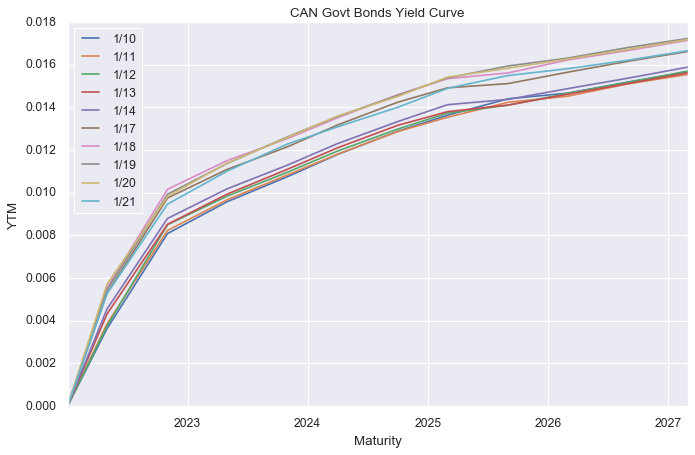

In [23]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()
plot_data=bonds_df[['MATURITY DATE','YTM-1/10/2022','YTM-1/11/2022','YTM-1/12/2022','YTM-1/13/2022','YTM-1/14/2022',
                   'YTM-1/17/2022','YTM-1/18/2022','YTM-1/19/2022','YTM-1/20/2022','YTM-1/21/2022']].copy()
plot_data
data = [{'MATURITY_DATE': datetime.strptime('Jan 1 2022  1:33PM', '%b %d %Y %I:%M%p'),'YTM-1/10/2022':0.0, 'YTM-1/11/2022': 0.0,
        'YTM-1/12/2022':0.0, 'YTM-1/13/2022':0.0, 'YTM-1/14/2022':0.0, 'YTM-1/17/2022':0.0, 'YTM-1/18/2022':0.0, 
        'YTM-1/19/2022':0.0, 'YTM-1/20/2022':0.0, 'YTM-1/21/2022':0.0}]

plot_data.loc[0]=list(data[0].values())
plot_data.sort_values(by='MATURITY DATE',inplace=True)

plt.figure(figsize=(10, 6))
ax = plt.subplot()
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/10/2022'],label='1/10')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/11/2022'],label='1/11')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/12/2022'],label='1/12')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/13/2022'],label='1/13')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/14/2022'],label='1/14')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/17/2022'],label='1/17')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/18/2022'],label='1/18')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/19/2022'],label='1/19')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/20/2022'],label='1/20')
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/21/2022'],label='1/21')

plt.title('CAN Govt Bonds Yield Curve')
plt.xlabel('Maturity')
plt.ylabel('YTM')
ax.legend(loc='upper left')
plt.show()


## 4 b) Spot Curve Functions

In [52]:
def getdirty(date,maturity_date,coupon,clean_price):
    coupondate=maturity_date
    n=0
    while (coupondate)>date:
        coupondate=coupondate-relativedelta(months=6)
        n=n+1
    #previous coupon date
    #print(n)
    prev_coup=coupondate
    #print(prev_coup)
    #dirty price=clean price plus accrued interest
    m=(date-prev_coup).days
    #print(m)
    dirty_price=clean_price+((m/365)*coupon)
    return dirty_price
def get_spots(prices,coupons,Maturity,date):
    spotrates=[]
    for i in range(0,len(prices)):
        if i==0:
            P = prices[i]
            #print(P)
            N = 100.0 + (coupons[0] / 2.0)
            #print(N)
            T = (Maturity[0] - date).days / 365.0
            #print(T)
            spot = -math.log(P/N) / T
            #print(spot)
            spotrates.append(spot)
        elif i<4:
            spot=bootstrapez(i,prices[i],coupons[i],Maturity,date,spotrates)
            spotrates.append(spot)
        elif i<6:
            spot=bootstraphard(i,prices[i],coupons[i],Maturity,date,spotrates)
            spotrates.append(spot)
        else:
            spot=bootstraphardest(i,prices[i],coupons[i],Maturity,date,spotrates)
            spotrates.append(spot)
            
            
    return spotrates
def bootstrapez(n,price,coupon,Maturity,date,spotrates):
    P=price
    backtrack=Maturity[n]
    for j in range(1,(n+1)):
        backtrack=backtrack-relativedelta(months=6)
        T = (backtrack-date).days / 365.0
        P = P-((coupon / 2.0) * math.exp(-T*spotrates[-j]))
    N = 100.0 + (coupon / 2.0)
    T = (Maturity[n] - date).days / 365.0
    return -math.log(P/N) / T
def bootstraphard(n,price,coupon,mat,date,spotrates):
    P=price
    backtrack=Maturity[n]
    for j in range(1,(n+1)):
        index=n-j
        if index<4:
            backtrack=backtrack-relativedelta(months=6)
            T = (backtrack-date).days / 365.0
            rate=interpolate_rate(backtrack,spotrates[index-1],Maturity[index-1],spotrates[index],Maturity[index])
            P = P-((coupon / 2.0) * math.exp(-T*rate))
        else:
            backtrack=backtrack-relativedelta(months=6)
            T = (backtrack-date).days / 365.0
            P = P-((coupon / 2.0) * math.exp(-T*spotrates[-j])) 
    N = 100.0 + (coupon / 2.0)
    T = (Maturity[n] - date).days / 365.0
    return -math.log(P/N) / T

def bootstraphardest(n,price,coupon,mat,date,spotrates):
    P=price
    backtrack=Maturity[n]
    for j in range(1,(n+1)):
        index=n-j
        if index<6:
            backtrack=backtrack-relativedelta(months=6)
            T = (backtrack-date).days / 365.0
            rate=interpolate_rate(backtrack,spotrates[index-1],Maturity[index-1],spotrates[index],Maturity[index])
            P = P-((coupon / 2.0) * math.exp(-T*rate))
        else:
            backtrack=backtrack-relativedelta(months=6)
            T = (backtrack-date).days / 365.0
            P = P-((coupon / 2.0) * math.exp(-T*spotrates[-j])) 
    N = 100.0 + (coupon / 2.0)
    T = (Maturity[n] - date).days / 365.0
    return -math.log(P/N) / T

def interpolate_rate(date,rprev,dateprev,rpost,datepost):
    tot=(datepost-dateprev).days
    r=((rprev)*((date-dateprev).days)/tot) + ((rpost)*((datepost-date).days)/tot)
    return r
            
        

In [53]:
spots={}
coupons=list(bonds_df['COUPON'])
Maturity=list(bonds_df['MATURITY'])
#print(Maturity)
#print(coupons)
for i in range(0,len(Maturity)):
        temp=Maturity[i]
        Maturity[i]=datetime.strptime(temp, "%m/%d/%Y")
for dts in (list(bonds_df.columns.values[4:14])):
    clean_prices=[]
    dirty_prices=[]
    clean_prices=list(bonds_df[dts])
    dirty_prices=[0.0 for i in clean_prices]
    for i in range(0,len(clean_prices)):
        temp=getdirty(datetime.strptime(dts, "%m/%d/%Y"),Maturity[i],coupons[i],clean_prices[i])
        dirty_prices[i]=temp
    spots[dts]=get_spots(dirty_prices,coupons,Maturity,datetime.strptime(dts, "%m/%d/%Y"))
    spots[dts].insert(0,0.0)
Maturity.insert(0,datetime.strptime('Jan 1 2022  1:33PM', '%b %d %Y %I:%M%p'))
spot_plot=pd.DataFrame.from_dict(spots)
spot_plot['MATURITY DATE']=list(plot_data['MATURITY DATE'])



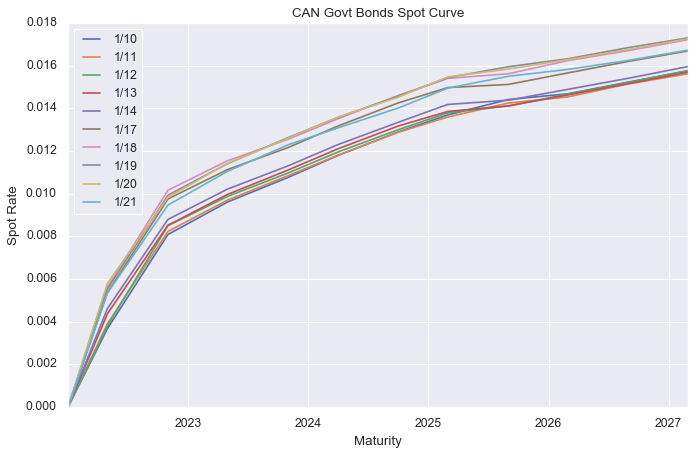

In [55]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
for dts in (bonds_df.columns.values[4:14]):
    plt.plot(spot_plot['MATURITY DATE'],spot_plot[dts],label='/'.join(dts.split('/')[0:2]))
plt.title('CAN Govt Bonds Spot Curve')
plt.xlabel('Maturity')
plt.ylabel('Spot Rate')
ax.legend(loc='upper left')
plt.show()

In [56]:
def forwardrate(spots,strdate,date,Maturity):
    interspot=[0.0 for i in range(5)]
    inter=[0.0 for i in range(5)]
    for i in range(1,6):
        inter[i-1]=date+relativedelta(months=12*i)
        interspot[i-1]=interpolate_rate(inter[i-1],spots[strdate][(2*i)-1],Maturity[(2*i)-1],spots[strdate][2*i],Maturity[2*i])  
    forward=[0.0 for i in range(4)]
    for i in range(1,5):
        forward[i-1]=((i+1)*interspot[i]-interspot[0])/i
    return forward,inter
        
        

In [57]:
forward={}
times={}
Maturity=list((bonds_df['MATURITY']))
for i in range(len(Maturity)):
              temp=Maturity[i]
              Maturity[i]=datetime.strptime(temp, "%m/%d/%Y")
for dts in (list(bonds_df.columns.values[4:14])):
              forward[dts],times[dts]=forwardrate(spots,dts,datetime.strptime(dts, "%m/%d/%Y"),Maturity)
forward_plot=pd.DataFrame.from_dict(forward)
        

In [58]:
X=np.zeros([4,9])
for i in range(0,4):
    for j,dts in enumerate(list(bonds_df.columns.values[4:13])):
        next_dts= list(bonds_df.columns.values)[4+j+1]
        #print(next_dts)
        X[i,j]=math.log((forward[next_dts][i])/(forward[dts][i]))
ytm_cov=np.cov(X)
ytm_cov, np.linalg.eig(ytm_cov)

(array([[0.00053573, 0.00052769, 0.00047335, 0.00048555],
        [0.00052769, 0.000565  , 0.0004953 , 0.00048722],
        [0.00047335, 0.0004953 , 0.00048191, 0.00048032],
        [0.00048555, 0.00048722, 0.00048032, 0.00049426]]),
 (array([1.99567815e-03, 5.13708969e-05, 2.73972362e-05, 2.45920092e-06]),
  array([[-0.50717111, -0.42408324,  0.68720338, -0.30113517],
         [-0.52058856, -0.53965543, -0.5700868 ,  0.33579846],
         [-0.48366658,  0.44745272, -0.36825651, -0.6559267 ],
         [-0.48767986,  0.57333366,  0.25911329,  0.60524141]])))

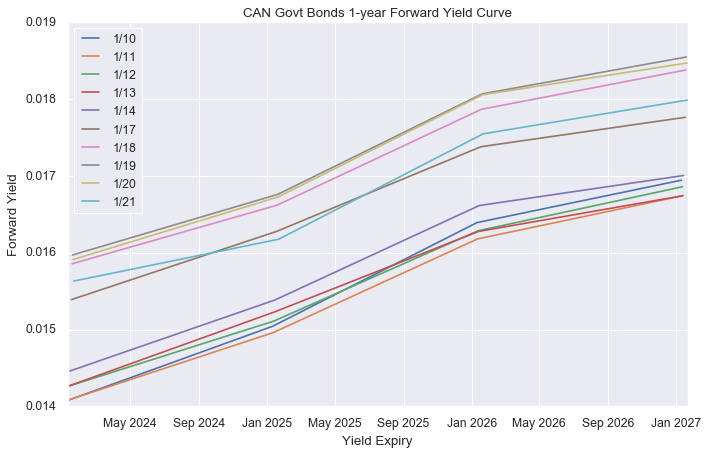

In [59]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()
for dts in (bonds_df.columns.values[4:14]):
    plt.plot(times[dts][1:],forward_plot[dts],label='/'.join(dts.split('/')[0:2]))
plt.title('CAN Govt Bonds 1-year Forward Yield Curve')
plt.xlabel('Yield Expiry')
plt.ylabel('Forward Yield')
ax.legend(loc='upper left')
plt.show()

In [535]:
ytms=bonds_df[['YTM-1/10/2022','YTM-1/11/2022','YTM-1/12/2022','YTM-1/13/2022','YTM-1/14/2022',
                   'YTM-1/17/2022','YTM-1/18/2022','YTM-1/19/2022','YTM-1/20/2022','YTM-1/21/2022']].copy()
ytms=ytms.reset_index()[['YTM-1/10/2022','YTM-1/11/2022','YTM-1/12/2022','YTM-1/13/2022','YTM-1/14/2022',
                   'YTM-1/17/2022','YTM-1/18/2022','YTM-1/19/2022','YTM-1/20/2022','YTM-1/21/2022']].to_dict()
for y in ['YTM-1/10/2022','YTM-1/11/2022','YTM-1/12/2022','YTM-1/13/2022','YTM-1/14/2022','YTM-1/17/2022','YTM-1/18/2022','YTM-1/19/2022','YTM-1/20/2022','YTM-1/21/2022']:
    ytms[y]=list(ytms[y].values())
yieldsm={}
for key in list(ytms.keys()):
    newkey=str(key.split('-')[1])
    yieldsm[newkey]=ytms[str(key)]
ytms=yieldsm
    

In [538]:
def interyield(ytms,strdate,date,Maturity):
    interyields=[0.0 for i in range(5)]
    inter=[0.0 for i in range(5)]
    for i in range(1,6):
        inter[i-1]=date+relativedelta(months=12*i)
        interyields[i-1]=interpolate_rate(inter[i-1],ytms[strdate][(2*i)-1],Maturity[(2*i)-1],ytms[strdate][2*i],Maturity[2*i])
    return interyields,inter

In [539]:
yieldstoM={}
ytmdates={}
Maturity=list((bonds_df['MATURITY']))
for i in range(len(Maturity)):
              temp=Maturity[i]
              Maturity[i]=datetime.strptime(temp, "%m/%d/%Y")
for dts in (list(bonds_df.columns.values[4:14])):
              yieldstoM[dts],ytmdates[dts]=interyield(ytms,dts,datetime.strptime(dts, "%m/%d/%Y"),Maturity)

In [548]:
yieldstoM

{'1/10/2022': [0.008993871224976606,
  0.011309651575611687,
  0.01312357224553853,
  0.014470053932162372,
  0.015317177409901463],
 '1/11/2022': [0.00909804822772359,
  0.011347053653515706,
  0.013078208130669948,
  0.014309061425795647,
  0.015215593915195627],
 '1/12/2022': [0.009299943747195942,
  0.01147967386162646,
  0.013216821130096118,
  0.01424323346021095,
  0.015305954412717487],
 '1/13/2022': [0.009356409107871319,
  0.011617815743602065,
  0.013353118532084422,
  0.014234013197749432,
  0.015242791077291984],
 '1/14/2022': [0.009607589504194835,
  0.01180746912355826,
  0.013570704690914624,
  0.014496047403695235,
  0.015495341695598805],
 '1/17/2022': [0.010515990676643008,
  0.012652932203052736,
  0.014430138672726064,
  0.01523593204925519,
  0.0162644330355298],
 '1/18/2022': [0.01091918598524707,
  0.013009844427807293,
  0.014796997284700159,
  0.01574979171549544,
  0.016771275214517437],
 '1/19/2022': [0.010733233198431148,
  0.013073975454705776,
  0.0147790

In [586]:
X=np.zeros([5,9])
for i in range(0,5):
    for j,dts in enumerate(list(bonds_df.columns.values[4:13])):
        next_dts= list(bonds_df.columns.values)[4+j+1]
        #print(next_dts)
        X[i,j]=math.log((yieldstoM[next_dts][i])/(yieldstoM[dts][i]))
ytm_cov=np.cov(X)
ytm_cov, np.linalg.eig(ytm_cov),

(array([[0.00130834, 0.00092985, 0.00090824, 0.0006838 , 0.00075771],
        [0.00092985, 0.00071533, 0.00069426, 0.0005605 , 0.00058886],
        [0.00090824, 0.00069426, 0.00068116, 0.00054312, 0.00057591],
        [0.0006838 , 0.0005605 , 0.00054312, 0.00054285, 0.0005198 ],
        [0.00075771, 0.00058886, 0.00057591, 0.0005198 , 0.00053358]]),
 (array([3.57494054e-03, 1.66603310e-04, 2.79553261e-05, 8.92416749e-06,
         2.83924483e-06]),
  array([[-0.58892507, -0.60583764,  0.49969707,  0.17908974,  0.06601299],
         [-0.44395876, -0.02686798, -0.56152256,  0.25530453, -0.6493772 ],
         [-0.43310039, -0.04323623, -0.54507116, -0.29099016,  0.65481053],
         [-0.35686664,  0.70852634,  0.22231882,  0.51946196,  0.22665002],
         [-0.37568355,  0.35827351,  0.29743407, -0.74042586, -0.30627516]])))

In [587]:
np.linalg.eig(ytm_cov)

(array([3.57494054e-03, 1.66603310e-04, 2.79553261e-05, 8.92416749e-06,
        2.83924483e-06]),
 array([[-0.58892507, -0.60583764,  0.49969707,  0.17908974,  0.06601299],
        [-0.44395876, -0.02686798, -0.56152256,  0.25530453, -0.6493772 ],
        [-0.43310039, -0.04323623, -0.54507116, -0.29099016,  0.65481053],
        [-0.35686664,  0.70852634,  0.22231882,  0.51946196,  0.22665002],
        [-0.37568355,  0.35827351,  0.29743407, -0.74042586, -0.30627516]]))